In [1]:
import lzma
import pickle

# load data
with lzma.open("../data/probabilistic_trajectory_forecast.pickle.xz", "rb") as f:
    data = pickle.load(f)

In [2]:
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, "..")

from plotting_utils import (
    to_contour,
    blend_heatmap,
    draw_contour_outline,
    add_arrow_from_line,
    show_with_clean_interface,
)

In [3]:
import random

# setup data

LINE_alpha = 0.7
prob_threshold = 0.011

observed_timestep = data["observed_timestep"]
prob_map = data["probability_map"]
image = data["image"]

historical_traj = data["trajectory"][:, : observed_timestep[0] + 1, ...]
observed_traj = data["trajectory"][
    :, observed_timestep[0] : observed_timestep[1] + 1, ...
]

colors = cm.gist_ncar(np.linspace(0, 1, observed_traj.shape[0]))

# mix up the color
random.seed(0)
random.shuffle(colors)

# prob_map[prob_map > prob_threshold] = prob_threshold

>> standalone heatmap


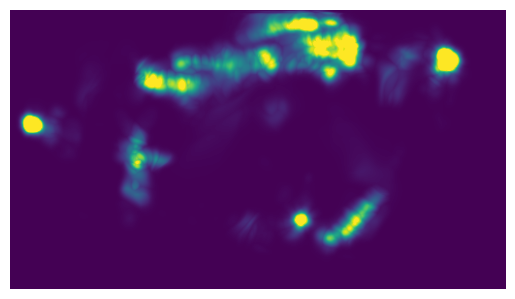

>> contour heatmap


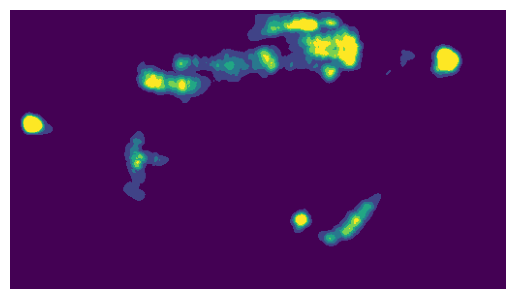

>> blended heatmap


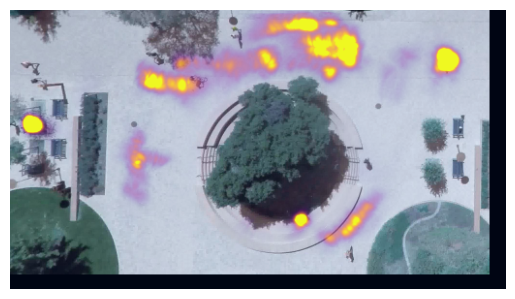

>> blended contour heatmap


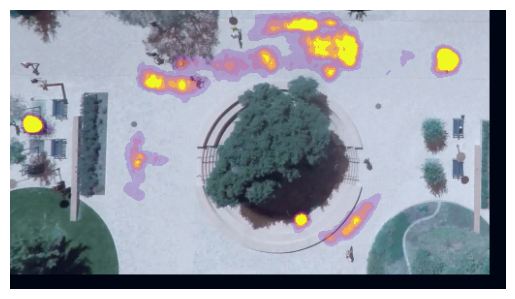

>> blended contour heatmap with outline


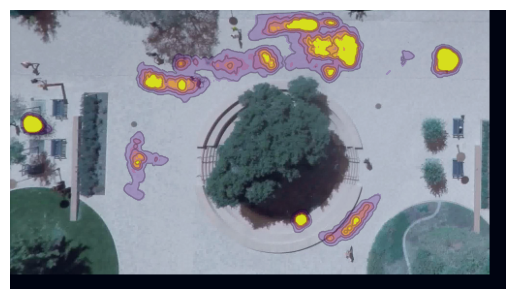

In [4]:
print(">> standalone heatmap")
plt.imshow(prob_map)
show_with_clean_interface()

print(">> contour heatmap")
plt.imshow(to_contour(prob_map))
show_with_clean_interface()

print(">> blended heatmap")
plt.imshow(blend_heatmap(prob_map, image))
show_with_clean_interface()

print(">> blended contour heatmap")
plt.imshow(blend_heatmap(to_contour(prob_map), image))
show_with_clean_interface()

print(">> blended contour heatmap with outline")
plt.imshow(blend_heatmap(to_contour(prob_map), image))
draw_contour_outline(prob_map)
show_with_clean_interface()

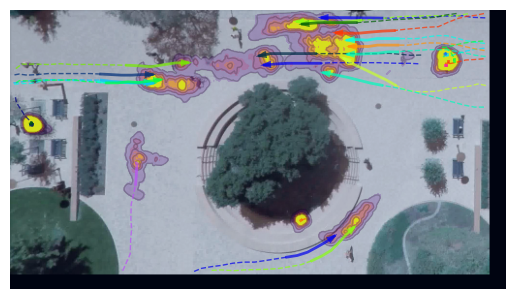

In [5]:
blended = blend_heatmap(to_contour(prob_map), image)
plt.imshow(blended)

draw_contour_outline(prob_map)

import cycler

# the following is by directly (and temporarily setting colour cycle)
plt.gca().set_prop_cycle('color', colors)
plt.plot(
    *historical_traj.T,
    lw=1,
    linestyle="dashed",
    alpha=LINE_alpha,
)
plt.gca().set_prop_cycle('color', colors)
lines = plt.plot(*observed_traj.T, lw=2, alpha=LINE_alpha)
for line in lines:
    add_arrow_from_line(line, size=7.5, alpha=LINE_alpha)
    
    
# the following is a loop-based solution to ensure color cycle is consistent
"""
# use primitive loop to set specific color
for ij, c in zip(range(historical_traj.shape[0]), colors):
    plt.plot(
        *historical_traj[ij].T,
        lw=1,
        linestyle="dashed",
        color=c,
        alpha=LINE_alpha,
    )

for ij, c in zip(range(historical_traj.shape[0]), colors):
    line = plt.plot(*observed_traj[ij].T, lw=2, color=c, alpha=LINE_alpha)
    add_arrow_from_line(line[0], size=7.5, alpha=LINE_alpha)
"""

# save_tight_image("my_output")
show_with_clean_interface()